In [67]:
import json
import urllib.request as ur

import xarray as xr
import numpy as np
import pandas as pd

import lmfit
import numdifftools
import corner
from scipy.stats import f_oneway

from matplotlib import pyplot as plt

from IPython.display import display, Markdown, HTML

_np = np.seterr(all="ignore", divide="raise")

In [5]:
url = 'https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-COUNTRIES.json'
with ur.urlopen(url) as _url:
    _data = json.loads(_url.read().decode())

In [43]:
country = "Italy"
x_dates = np.array(list(_data[country]["Confirmed"].keys()))
x = np.arange(0, len(x_dates))
y = np.array(list(_data[country]["Confirmed"].values()))
dy = pd.Series(y).diff()[1:]

In [68]:
def check_model(model, x, y):
    pars = model.guess(y, x=x)
    out = model.fit(y, pars, x=x)
    print(out.fit_report(min_correl=0.25))
    out.plot()
    return out

In [87]:
skew_gauss = lmfit.models.SkewedGaussianModel()
skew_voigt = lmfit.models.SkewedVoigtModel()
poly = lmfit.models.PolynomialModel(7)
exp_gauss = lmfit.models.ExponentialGaussianModel(nan_policy='propagate')
log_norm = lmfit.models.LognormalModel()
wigner = lmfit.models.BreitWignerModel()
moffat = lmfit.models.MoffatModel()
donaich = lmfit.models.DonaichModel()

[[Model]]
    Model(skewed_gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 88
    # data points      = 96
    # variables        = 4
    chi-square         = 28116083.2
    reduced chi-square = 305609.600
    Akaike info crit   = 1216.40040
    Bayesian info crit = 1226.65779
[[Variables]]
    amplitude:  231486.167 +/- 7894.97625 (3.41%) (init = 393420)
    center:     50.9712825 +/- 0.53730318 (1.05%) (init = 68.63636)
    sigma:      31.5166906 +/- 1.78833806 (5.67%) (init = 20)
    gamma:      5.37382964 +/- 0.86133925 (16.03%) (init = 0)
    height:     2930.18150 +/- 106.460229 (3.63%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    fwhm:       74.2161334 +/- 4.21121421 (5.67%) == '2.3548200*sigma'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma)  =  0.791
    C(sigma, gamma)      =  0.701
    C(center, sigma)     = -0.656
    C(center, gamma)     = -0.514
    C(amplitude, center) = -0.479
    C(a

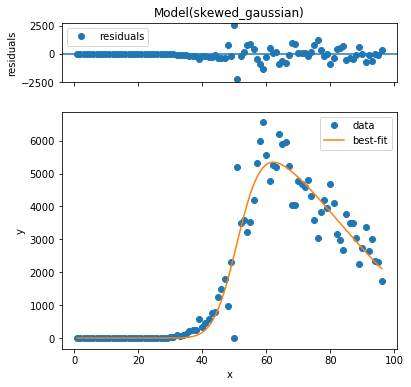

In [70]:
out_skew_gauss = check_model(skew_gauss, x[1:], dy)

[[Model]]
    Model(skewed_voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 72
    # data points      = 96
    # variables        = 4
    chi-square         = 27737383.8
    reduced chi-square = 301493.303
    Akaike info crit   = 1215.09857
    Bayesian info crit = 1225.35597
[[Variables]]
    amplitude:  287683.257 +/- 10856.7849 (3.77%) (init = 393420)
    center:     51.1705281 +/- 0.55880185 (1.09%) (init = 68.63636)
    sigma:      20.0350763 +/- 1.31480466 (6.56%) (init = 20)
    skew:       3.32628256 +/- 0.56320786 (16.93%) (init = 0)
    gamma:      20.0350763 +/- 1.31480466 (6.56%) == 'sigma'
    height:     5728.40443 +/- 228.985059 (4.00%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    fwhm:       72.1525208 +/- 4.73501919 (6.56%) == '3.6013100*sigma'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma)  =  0.834
    C(sigma, skew)       =  0.756
    C(center, sigma)     = -0.691
    C(center, ske

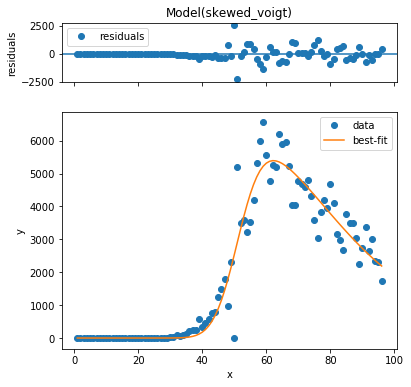

In [75]:
out_skew_voigt = check_model(skew_voigt, x[1:], dy)

[[Model]]
    Model(expgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 96
    # variables        = 4
    chi-square         = 26823412.5
    reduced chi-square = 291558.831
    Akaike info crit   = 1211.88200
    Bayesian info crit = 1222.13939
[[Variables]]
    amplitude:  281096.834 +/- 15803.6651 (5.62%) (init = 393420)
    center:     52.3192742 +/- 0.57017410 (1.09%) (init = 68.63636)
    sigma:      6.39171279 +/- 0.64135463 (10.03%) (init = 20)
    gamma:      0.02777540 +/- 0.00304870 (10.98%) (init = 1)
    height:     3406.97610 +/- 137.743621 (4.04%) == 'amplitude*gamma/2*exp(gamma**2*sigma**2/2)*erfc(gamma*sigma/sqrt(2))'
    fwhm:       15.0513331 +/- 1.51027471 (10.03%) == '2.3548200*sigma'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, gamma)  = -0.929
    C(center, gamma)     =  0.727
    C(amplitude, center) = -0.655
    C(sigma, gamma)      =  0.577
    C(center, sigma)     =  

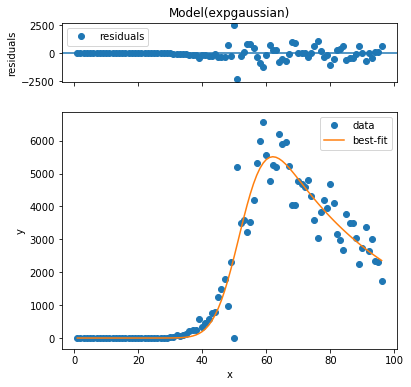

In [79]:
out_exp_gauss = check_model(exp_gauss, x[1:], dy)

[[Model]]
    Model(lognormal)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 96
    # variables        = 3
    chi-square         = 8.3750e+08
    reduced chi-square = 9005427.78
    Akaike info crit   = 1540.23258
    Bayesian info crit = 1547.92562
##  Warning: uncertainties could not be estimated:
    center:     at initial value
    center:     at boundary
    sigma:      at initial value
[[Variables]]
    amplitude:  1.1706e-09 (init = 1)
    center:     1.0000e-19 (init = 1e-19)
    sigma:      0.25000000 (init = 0.25)
    height:     1.9273e-09 == 'amplitude/max(2.220446049250313e-16, (sigma*sqrt(2*pi)))*exp(sigma**2/2-center)'
    fwhm:       0.56105802 == 'exp(center-sigma**2+sigma*sqrt(2*log(2)))-exp(center-sigma**2-sigma*sqrt(2*log(2)))'


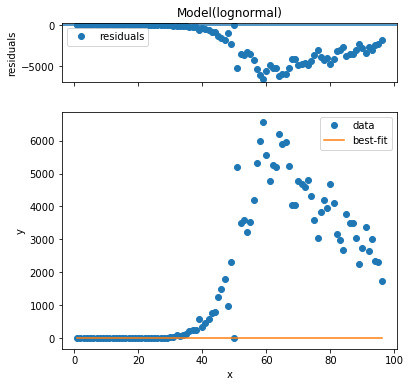

In [82]:
out_log_norm = check_model(log_norm, x[1:], dy)

[[Model]]
    Model(donaich)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 96
    # variables        = 4
    chi-square         = 41707941.0
    reduced chi-square = 453347.185
    Akaike info crit   = 1254.25798
    Bayesian info crit = 1264.51537
[[Variables]]
    amplitude:  247824.142 +/- 36884.4574 (14.88%) (init = 196710)
    center:     62.4453719 +/- 0.95191565 (1.52%) (init = 68.63636)
    sigma:      21.9991067 +/- 1.44791327 (6.58%) (init = 20)
    gamma:     -0.22416040 +/- 0.02874718 (12.82%) (init = 0)
    height:     5288.43065 +/- 200.662134 (3.79%) == 'amplitude/max(2.220446049250313e-16, (sigma**(1-gamma)))*cos(pi*gamma/2)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, gamma)  = -0.958
    C(amplitude, sigma)  =  0.870
    C(center, gamma)     =  0.815
    C(amplitude, center) = -0.764
    C(sigma, gamma)      = -0.743
    C(center, sigma)     = -0.567


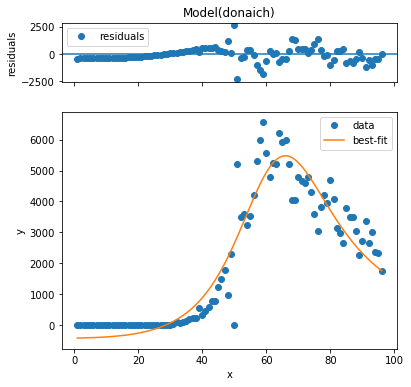

In [88]:
out_donaich = check_model(donaich, x[1:], dy)

In [136]:
anova = f_oneway(
    out_skew_gauss.residual,
    out_skew_voigt.residual,
    out_exp_gauss.residual,
    #out_log_norm.residual,
)
f"stat:{anova.statistic:.5f} - pval: {anova.pvalue:.7f}"

'stat:0.00090 - pval: 0.9990956'

In [137]:
anova = f_oneway(
    out_skew_gauss.best_fit,
    out_skew_voigt.best_fit,
    out_exp_gauss.best_fit,
    #out_log_norm.best_fit,
)
f"stat:{anova.statistic:.5f} - pval: {anova.pvalue:.7f}"

'stat:0.00006 - pval: 0.9999385'

In [143]:
out_donaich

AttributeError: 'ModelResult' object has no attribute 'keys'